In [1]:
import pandas as pd
import numpy as np
import nltk
from pathlib import Path
import dtale
import pprint
from matplotlib import pyplot as plt
import matplotlib

In [23]:
df1 = pd.read_csv("./oesch16_nur/nn.csv",  sep = ",")
df2 = pd.read_csv("./oesch16_nur/xgb.csv",  sep = ",")
df3 = pd.read_csv("./oesch16_nur/linear.csv",  sep = ",")
df = pd.concat([df1, df2, df3])
df= df.rename(columns={'combi average.combi validation accuracy': 'confidence average @0.0.validation accuracy @0.0: '})
df['confidence average @0.0.percentage labelled @0.0: '] = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
#df = df[df.combi_model=="nn"]
#df = df[df.combi_model=="xgboost"]
#df = df[df.combi_model=="linear"]
df.head(12)

,Name,combi_model,confidence average @0.0.validation accuracy @0.0:,confidence average @0.5.percentage labelled @0.5:,confidence average @0.55.percentage labelled @0.55:,confidence average @0.6.percentage labelled @0.6:,confidence average @0.65.percentage labelled @0.65:,confidence average @0.7.percentage labelled @0.7:,confidence average @0.75.percentage labelled @0.75:,confidence average @0.8.percentage labelled @0.8:,...,confidence average @0.98.validation accuracy @0.98:,confidence average @0.99.validation accuracy @0.99:,confidence average @0.992.validation accuracy @0.992:,confidence average @0.994.validation accuracy @0.994:,confidence average @0.995.validation accuracy @0.995:,confidence average @0.996.validation accuracy @0.996:,confidence average @0.997.validation accuracy @0.997:,confidence average @0.998.validation accuracy @0.998:,confidence average @0.999.validation accuracy @0.999:,confidence average @0.0.percentage labelled @0.0:
0,"""real_third""",nn,0.855197,0.999013,0.990163,0.979303,0.970433,0.959603,0.944153,0.928720,...,0.935387,0.944643,0.949220,0.953723,0.954923,0.962330,0.962303,0.966060,0.715500,1.0
1,"""third""",nn,0.865667,0.997000,0.984333,0.973000,0.957667,0.945333,0.929333,0.915000,...,0.940667,0.949333,0.949667,0.954333,0.957667,0.960667,0.962333,0.969000,0.696000,1.0
2,"""second""",nn,0.853000,0.997333,0.989000,0.979667,0.970333,0.958667,0.945667,0.927000,...,0.935667,0.941000,0.944333,0.946000,0.946333,0.951667,0.956667,0.962667,0.865667,1.0
3,"""best""",nn,0.854667,0.998333,0.986333,0.975000,0.966333,0.956000,0.939333,0.921667,...,0.941333,0.951000,0.951667,0.953667,0.955000,0.958000,0.966333,0.966333,0.719000,1.0
0,"""real_third""",xgboost,0.841080,0.999670,0.998680,0.996383,0.991453,0.989157,0.984553,0.977660,...,0.905697,0.917303,0.919920,0.926613,0.930757,0.933170,0.938790,0.941963,0.942190,1.0
1,"""third""",xgboost,0.845333,1.000000,0.999667,0.998000,0.995333,0.993667,0.983667,0.973667,...,0.919667,0.926333,0.928000,0.931667,0.932667,0.937000,0.938333,0.941667,0.945333,1.0
2,"""second""",xgboost,0.842667,1.000000,0.998667,0.997333,0.995667,0.993333,0.988667,0.978667,...,0.901000,0.910333,0.913333,0.921667,0.924667,0.930333,0.935333,0.938333,0.940333,1.0
3,"""best""",xgboost,0.841333,1.000000,0.996000,0.993667,0.989000,0.984000,0.979667,0.973000,...,0.906333,0.916000,0.920667,0.929333,0.933333,0.936667,0.941333,0.943333,0.947667,1.0
0,"""real_third""",linear,0.851250,0.993763,0.978987,0.960593,0.947443,0.930043,0.905097,0.876860,...,0.957250,0.964923,0.960170,0.968403,0.982160,0.990953,0.233333,0.000000,0.000000,1.0
1,"""third""",linear,0.860333,0.991333,0.976000,0.959333,0.938667,0.921667,0.901333,0.873333,...,0.954667,0.958000,0.964000,0.978333,0.989000,0.993667,0.100000,0.000000,0.000000,1.0


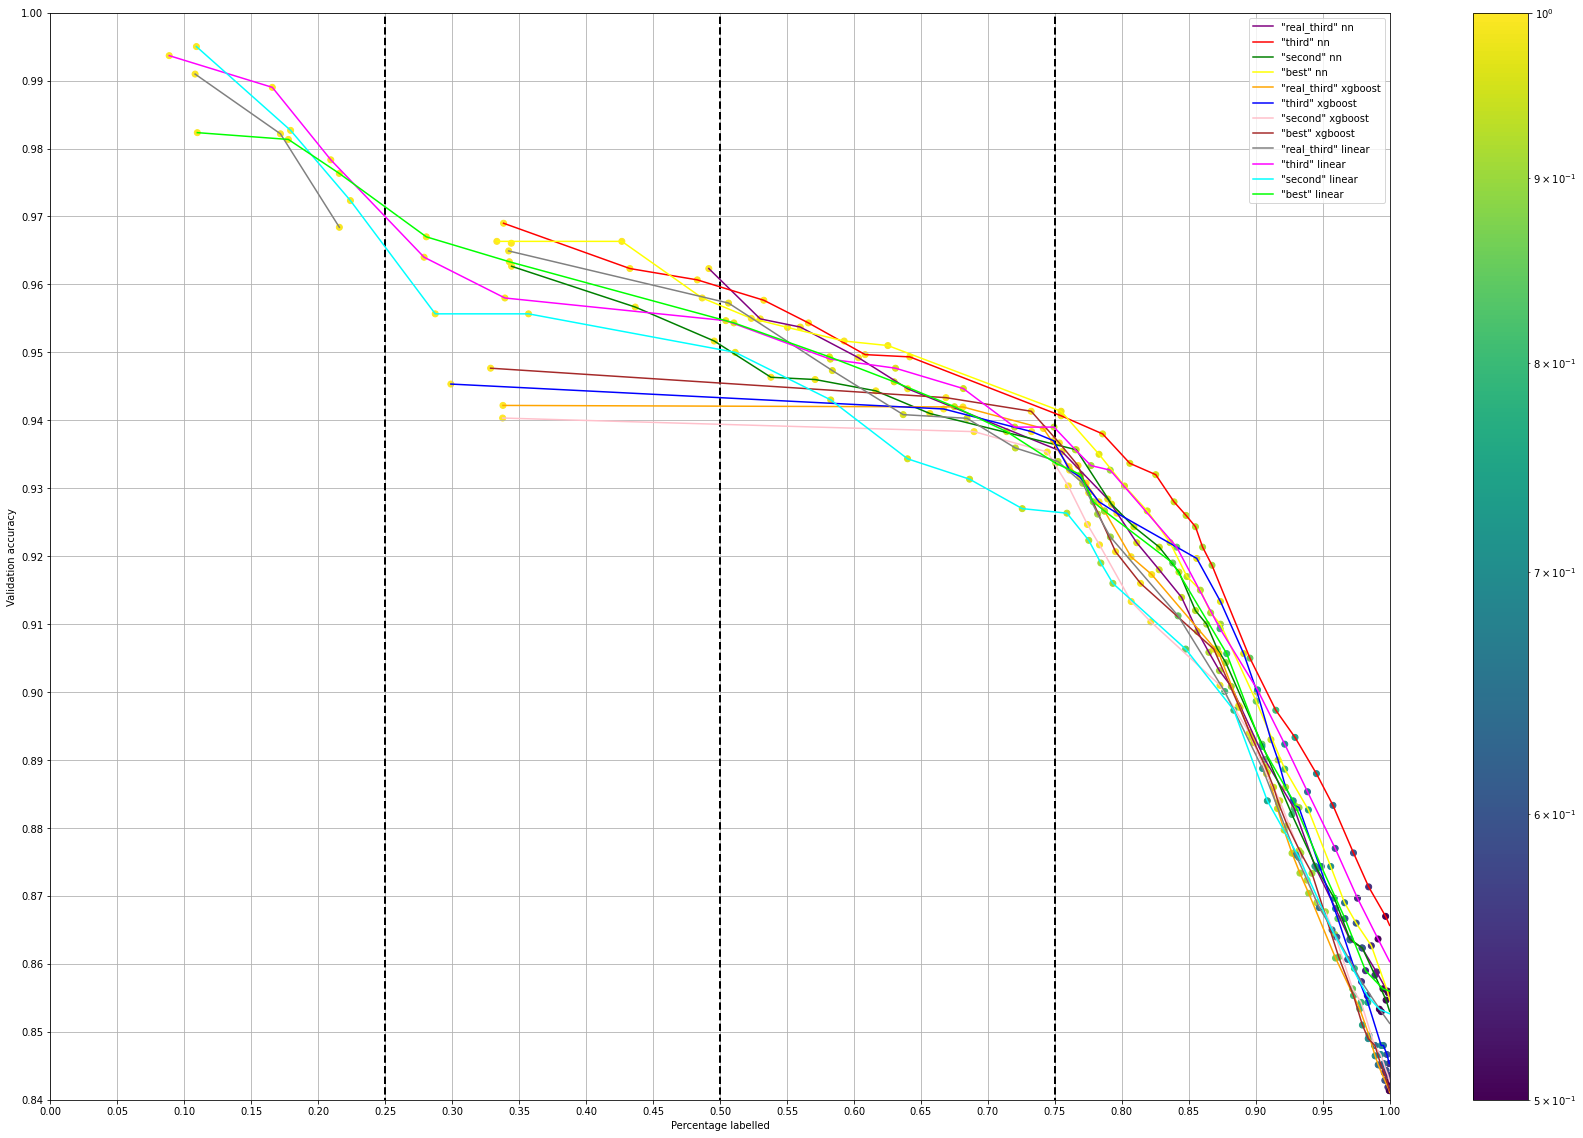

In [28]:
df1 = pd.read_csv("./oesch16_nur/nn.csv",  sep = ",")
df2 = pd.read_csv("./oesch16_nur/xgb.csv",  sep = ",")
df3 = pd.read_csv("./oesch16_nur/linear.csv",  sep = ",")
df = pd.concat([df1, df2, df3])
df= df.rename(columns={'combi average.combi validation accuracy': 'confidence average @0.0.validation accuracy @0.0: '})
df['confidence average @0.0.percentage labelled @0.0: '] = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

#df = df[df.combi_model=="nn"] # hier third bestes
#df = df[df.combi_model=="xgboost"] # hier third bestes, aber später best bestes
#df = df[df.combi_model=="linear"] # hier third bestes

#df = df[df['Name'] == '"best"']
#df = df[df['Name'] == '"second"']
#df = df[df['Name'] == '"third"']
#df = df[df['Name'] == '"real_third"']


names = df.Name.values
combi_model = df.combi_model.values
#val_acc= df['combi average.combi validation accuracy'].values
colors = ["purple", "red", "green", "yellow", "orange", "blue", "pink", "brown", "grey", "magenta", "cyan", "lime"]
colors = np.asarray(colors)#display(df)


output = None
percentages = []
accuracies = []

confidences = [0.0, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,0.992,0.994,0.995, 0.996, 0.997, 0.998, 0.999]
#confidences.reverse()


accuracies.append

for i in confidences:
    perc = f"confidence average @{i}.percentage labelled @{i}: "
    acc = f"confidence average @{i}.validation accuracy @{i}: "
    # hängt alle 9 percentages für gegebene confidence an
    percentages.append(df[perc])
    # hängt alle 9 accuracies für gegebene confidence an
    accuracies.append(df[acc])
    #print(df[f"confidence average @{i}.percentage labelled @{i}: "]) 

accuracies= np.column_stack(accuracies)
accuracies = [x for x in accuracies]
percentages = np.column_stack(percentages)
percentages = [x for x in percentages]

# ich gehe durch die accuracies und ersetze werte wenn es wieder kleiner wird durch nan
for row in range(len(accuracies)):
    max = 0
    for value in range(len(accuracies[row])):
        if accuracies[row][value]<max:
            accuracies[row][value] = None
        else:
            max = accuracies[row][value]


plt.figure(figsize= (30,20))
for perc, acc, name, combi_mod, linecolor in zip(percentages, accuracies, names, combi_model, colors):
    #print(percentages)
    #for i, j, k in zip(perc, acc, confidences):
    plt.scatter(x=perc, y=acc, c=confidences, norm=matplotlib.colors.LogNorm(vmin=0.5, vmax=1.0))
    plt.plot(perc, acc, c=linecolor,  label = f"{name} {combi_mod}")
plt.colorbar()

plt.xlim((0, 1))
#plt.xscale('log')
plt.ylim((0.84, 1.0))
plt.grid()
plt.yticks(np.arange(0.84, 1.0, step=0.01))
plt.xticks(np.arange(0, 1.025, step=0.05))
plt.xlabel("Percentage labelled")
plt.ylabel("Validation accuracy")
plt.legend()
plt.vlines(x=[0.25, 0.5, 0.75], ymin=0, ymax=1, colors='black', ls='--', lw=2)
#plt.title("")
plt.show()

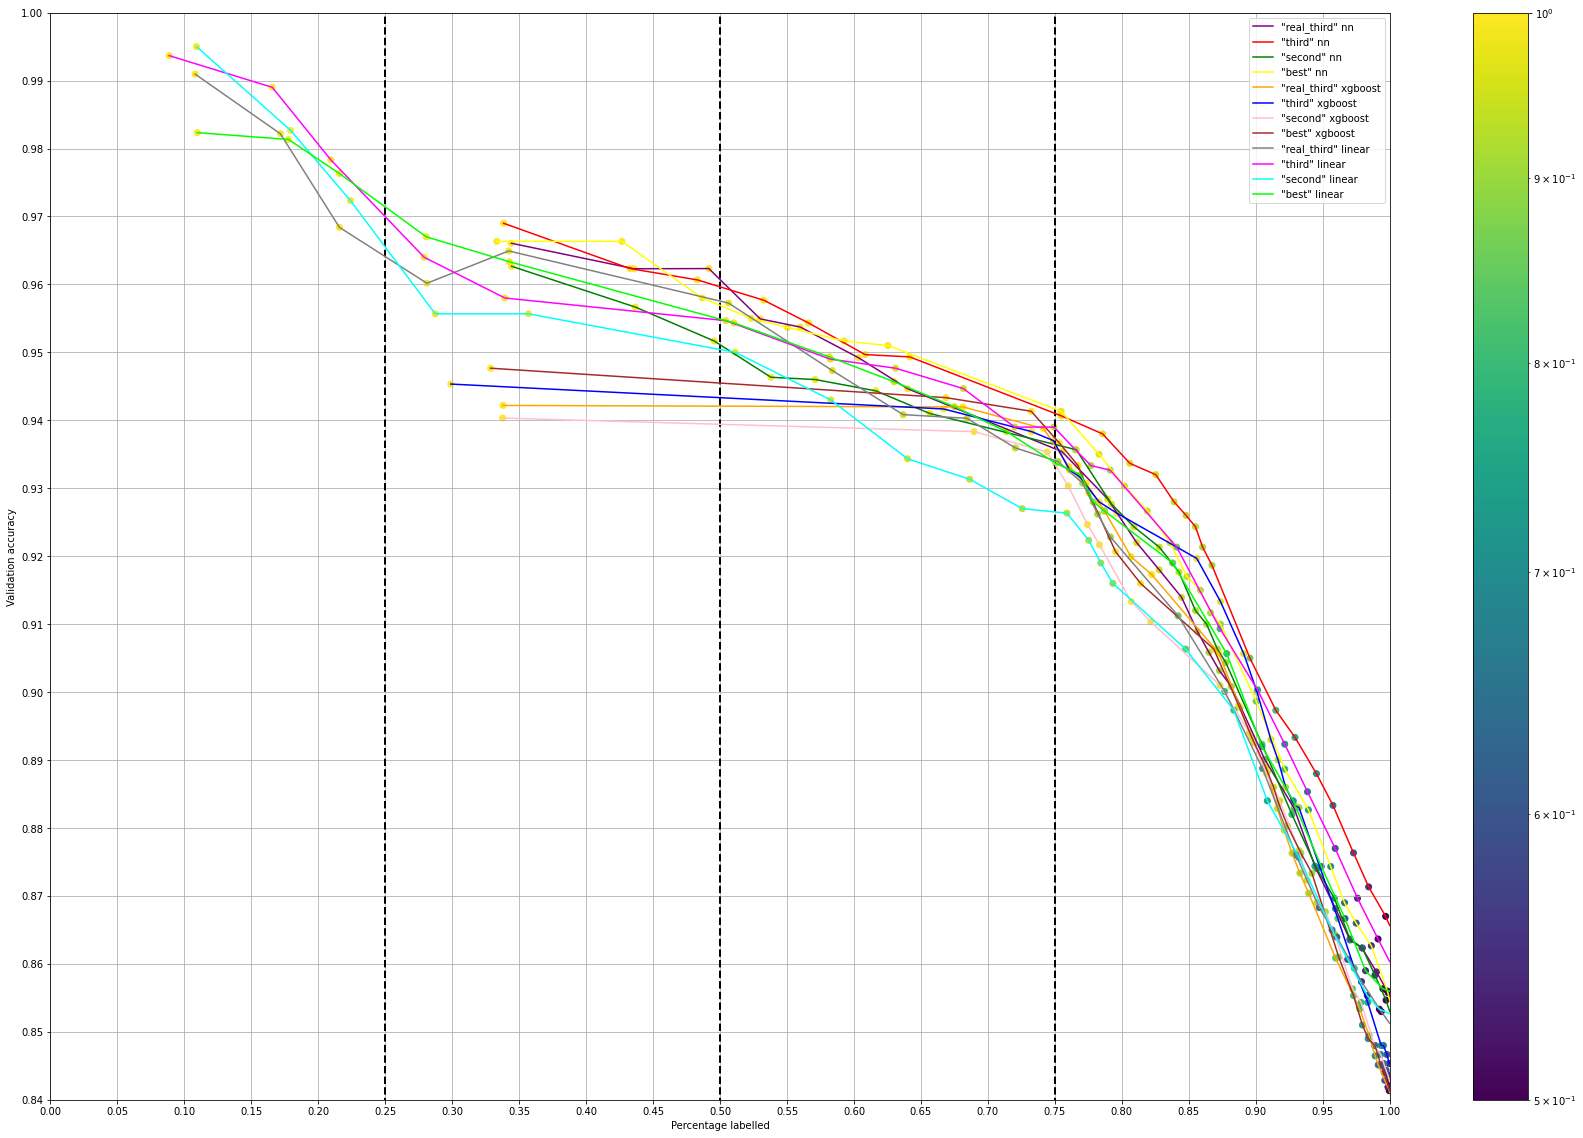

In [35]:
df1 = pd.read_csv("./oesch16_nur/nn.csv",  sep = ",")
df2 = pd.read_csv("./oesch16_nur/xgb.csv",  sep = ",")
df3 = pd.read_csv("./oesch16_nur/linear.csv",  sep = ",")
df = pd.concat([df1, df2, df3])
df= df.rename(columns={'combi average.combi validation accuracy': 'confidence average @0.0.validation accuracy @0.0: '})
df['confidence average @0.0.percentage labelled @0.0: '] = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

#df = df[df.combi_model=="nn"]
#df = df[df.combi_model=="xgboost"]
#df = df[df.combi_model=="linear"]

#df = df[df['Name'] == '"best"']
#df = df[df['Name'] == '"second"']
#df = df[df['Name'] == '"third"']
#df = df[df['Name'] == '"real_third"']


names = df.Name.values
combi_model = df.combi_model.values
#val_acc= df['combi average.combi validation accuracy'].values
colors = ["purple", "red", "green", "yellow", "orange", "blue", "pink", "brown", "grey", "magenta", "cyan", "lime"]
colors = np.asarray(colors)#display(df)


output = None
percentages = []
accuracies = []

confidences = [0.0, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,0.992,0.994,0.995, 0.996, 0.997, 0.998, 0.999]
#confidences.reverse()


accuracies.append

for i in confidences:
    perc = f"confidence average @{i}.percentage labelled @{i}: "
    acc = f"confidence average @{i}.validation accuracy @{i}: "
    # hängt alle 9 percentages für gegebene confidence an
    percentages.append(df[perc])
    # hängt alle 9 accuracies für gegebene confidence an
    accuracies.append(df[acc])
    #print(df[f"confidence average @{i}.percentage labelled @{i}: "]) 

accuracies= np.column_stack(accuracies)
accuracies = [x for x in accuracies]
percentages = np.column_stack(percentages)
percentages = [x for x in percentages]

# ich gehe durch die accuracies und ersetze werte wenn es wieder kleiner wird durch nan
for row in range(len(accuracies)):
    max = 0
    for value in range(len(accuracies[row])):
        if accuracies[row][value]<(max-0.005):
            accuracies[row][value] = None
        else:
            max = accuracies[row][value]


plt.figure(figsize= (30,20))
for perc, acc, name, combi_mod, linecolor in zip(percentages, accuracies, names, combi_model, colors):
    #print(percentages)
    #for i, j, k in zip(perc, acc, confidences):
    plt.scatter(x=perc, y=acc, c=confidences, norm=matplotlib.colors.LogNorm(vmin=0.5, vmax=1.0))
    plt.plot(perc, acc, c=linecolor,  label = f"{name} {combi_mod}")
plt.colorbar()

plt.xlim((0, 1))
#plt.xscale('log')
plt.ylim((0.84, 1.0))
plt.grid()
plt.yticks(np.arange(0.84, 1.0, step=0.01))
plt.xticks(np.arange(0, 1.025, step=0.05))
plt.xlabel("Percentage labelled")
plt.ylabel("Validation accuracy")
plt.legend()
plt.vlines(x=[0.25, 0.5, 0.75], ymin=0, ymax=1, colors='black', ls='--', lw=2)
#plt.title("")
plt.show()